In [2]:
import os
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
if not os.getenv("GROQ_API_KEY"):
    raise ValueError("Set GROQ_API_KEY in your environment/.env before running this notebook.")

## Mem0 Memory

In [18]:
mem0_config = {
    "llm":{"provider": "groq",
        "config": {
            "model": "llama-3.3-70b-versatile",
            "api_key": os.environ["GROQ_API_KEY"],
            "temperature": 0,
        },},
    "embedder":{"provider": "huggingface",
        "config": {
            "model": "all-MiniLM-L6-v2",
        },},
    "vector_store": {
        "provider": "qdrant",
        "config": {
            "path": "./data/mem0-qdrant",
            "embedding_model_dims": 384,
        },}
}

In [19]:
from mem0 import Memory

m = Memory.from_config(mem0_config)

Loading weights: 100%|██████████| 103/103 [00:00<00:00, 1985.78it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [ ]:
messages = [
    {"role": "user", "content": "Hi, I'm Alex. I love basketball and gaming."},
    {"role": "assistant", "content": "Hey Alex! I'll remember your interests."}
]
m.add(messages, user_id="alex")

{'results': [{'id': 'cb7f8e57-3605-484f-a174-b55e73c42aba',
   'memory': 'Name is Alex',
   'event': 'ADD'},
  {'id': 'a79dff44-c3ee-49b7-add9-48beaa832949',
   'memory': 'Loves basketball',
   'event': 'ADD'},
  {'id': 'f962a180-4081-43aa-bd75-1164219d279b',
   'memory': 'Loves gaming',
   'event': 'ADD'}]}

In [26]:
results = m.search("What do you know about me?", user_id= "alex")
print(results)

{'results': [{'id': 'cb7f8e57-3605-484f-a174-b55e73c42aba', 'memory': 'Name is Alex', 'hash': 'd0fccc8fa47f7a149ee95750c37bb0ca', 'metadata': None, 'score': 0.21450165832648355, 'created_at': '2026-02-26T18:53:10.356676-08:00', 'updated_at': None, 'user_id': 'alex'}, {'id': 'a79dff44-c3ee-49b7-add9-48beaa832949', 'memory': 'Loves basketball', 'hash': 'af2e8a68f80d5ece763865e3a5d5ce15', 'metadata': None, 'score': 0.13287629320707073, 'created_at': '2026-02-26T18:53:10.359162-08:00', 'updated_at': None, 'user_id': 'alex'}, {'id': 'f962a180-4081-43aa-bd75-1164219d279b', 'memory': 'Loves gaming', 'hash': '8b423caec418a7703c88e0301440ab77', 'metadata': None, 'score': 0.12855651030644138, 'created_at': '2026-02-26T18:53:10.361112-08:00', 'updated_at': None, 'user_id': 'alex'}]}


In [32]:
results = m.search("What do you know about me?", user_id="yash")
print(results)

{'results': [{'id': '3aebb27b-a544-44c1-8691-aa8a87527354', 'memory': 'Name is Yash', 'hash': '3a83983ff75ce97f6a815730f2973543', 'metadata': None, 'score': 0.206382123215912, 'created_at': '2026-02-26T18:58:32.759230-08:00', 'updated_at': None, 'user_id': 'yash'}, {'id': '4ac8edfa-962e-4ffc-ac48-525fb20b9fb9', 'memory': 'Loves programming', 'hash': 'bde334c7c0af7c2d95d6a506ca6d311e', 'metadata': None, 'score': 0.13039750007037482, 'created_at': '2026-02-26T18:58:32.767452-08:00', 'updated_at': None, 'user_id': 'yash'}, {'id': 'e1b17b77-8020-4dad-8d99-bb95382442bb', 'memory': 'Loves chess', 'hash': 'fec0a0f2467a754e2d41bf36e7c7d727', 'metadata': None, 'score': 0.08791411533570231, 'created_at': '2026-02-26T18:58:32.763707-08:00', 'updated_at': None, 'user_id': 'yash'}]}


In [29]:
messages = [
    {"role": "user", "content": "Hi, I'm Yash. I love chess and programming."},
    {"role": "assistant", "content": "Hey Yash! I'll remember your interests."}
]
m.add(messages, user_id="yash")

{'results': [{'id': '3aebb27b-a544-44c1-8691-aa8a87527354',
   'memory': 'Name is Yash',
   'event': 'ADD'},
  {'id': 'e1b17b77-8020-4dad-8d99-bb95382442bb',
   'memory': 'Loves chess',
   'event': 'ADD'},
  {'id': '4ac8edfa-962e-4ffc-ac48-525fb20b9fb9',
   'memory': 'Loves programming',
   'event': 'ADD'}]}

## Langchain Agents

In [1]:
from langchain_groq import ChatGroq


/Users/yashpatil/Developer/AI/Evolvue/cutomer_support_agent_live/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="llama-3.1-8b-instant", temperature=0, max_tokens=128)

llm_groq.invoke("hi! i am yash")

AIMessage(content='Nice to meet you, Yash. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 41, 'total_tokens': 65, 'completion_time': 0.027296037, 'completion_tokens_details': None, 'prompt_time': 0.003427278, 'prompt_tokens_details': None, 'queue_time': 0.046770559, 'total_time': 0.030723315}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c9d4f-98d8-7160-9e86-7647bec5dbad-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 24, 'total_tokens': 65})

In [8]:
from langchain.agents import create_agent
from langchain.tools import tool

In [17]:
@tool
def dummy_tool(inputText:str)-> str:
    """Convert input text to uppercase. This is just for testing.
     Arguments:
        inputText {str} -- input text to be converted to uppercase
    """
    return f"Outputs : {inputText.upper()}"

In [18]:
my_tools = [dummy_tool]

In [19]:
my_agent = create_agent(model=llm_groq,tools=my_tools)

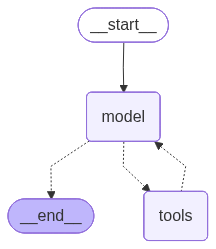

In [20]:
my_agent

In [13]:
res = my_agent.invoke({"messages":[("user","hi! i am yash")]})

In [14]:
res

{'messages': [HumanMessage(content='hi! i am yash', additional_kwargs={}, response_metadata={}, id='ea882f54-74cd-4dac-b86c-4b6b3c4f0806'),
  AIMessage(content="Hello Yash, it's nice to meet you. Is there something I can help you with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 268, 'total_tokens': 290, 'completion_time': 0.041837105, 'completion_tokens_details': None, 'prompt_time': 0.016939066, 'prompt_tokens_details': None, 'queue_time': 0.044789485, 'total_time': 0.058776171}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c9d53-eb1f-7ba0-a792-86074ce00a8f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 268, 'output_tokens': 22, 'total_tokens': 290})]}

In [21]:
res_with_tool = my_agent.invoke({"messages":[("user","hi! i am yash and i want to convert `Ai agent` to uppercase")]})

In [22]:
res_with_tool

{'messages': [HumanMessage(content='hi! i am yash and i want to convert `Ai agent` to uppercase', additional_kwargs={}, response_metadata={}, id='9bd33f8a-9ddc-4934-b7a0-989ea123bf01'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'eqgsg05zb', 'function': {'arguments': '{"inputText":"Ai agent"}', 'name': 'dummy_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 279, 'total_tokens': 296, 'completion_time': 0.019816172, 'completion_tokens_details': None, 'prompt_time': 0.016860014, 'prompt_tokens_details': None, 'queue_time': 0.045555997, 'total_time': 0.036676186}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c9d56-0547-7593-8cd1-757c3b996b6a-0', tool_calls=[{'name': 'dummy_tool', 'args': {'inputText': 'Ai agent'}, 'id': 'eqgsg05zb', 'type': 'tool_call'}], inval